# Homelessness Modeling

There was not enough time to thoroughly clean enough data between the FiSC and Homelessness datasets to accurately train a model. However, model training was attempted below with the tiny 29 observations that we were able to clean. The results are expected -- that the model cannot learn well enough on only 29 observations.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#standard scaler
# lin reg
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('hl_fisc.csv')

In [4]:
df.head()

,CoC Number,CoC Name,Year,Attribute Name,Value,year,city_name,city_types,id_city,city_population,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,state,city
0,AK-500,Anchorage,2015,Homeless Individuals,837,2015,AK: Anchorage,core,22002001,299927,...,2652.64,NaN,NaN,NaN,4.0,48368.0,NaN,1.0,AK,Anchorage
1,CA-501,San Francisco,2015,Homeless Individuals,6175,2015,CA: San Francisco,core,52038001,851116,...,8962.01,NaN,NaN,NaN,1.0,58865.0,1.0,1.0,CA,San Francisco
2,CA-606,Long Beach,2015,Homeless Individuals,1937,2015,CA: Long Beach,core,52019026,469539,...,4418.02,Los Angeles,51019019.0,10048408.0,3.0,71179.0,2.0,0.0,CA,Long Beach
3,CO-503,Denver,2015,Homeless Individuals,3039,2015,CO: Denver,core,62016001,664870,...,2750.43,NaN,NaN,NaN,1.0,69766.0,1.0,1.0,CO,Denver
4,CT-502,Hartford,2015,Homeless Individuals,561,2015,CT: Hartford,core|legacy,72002002,124683,...,2276.76,NaN,NaN,897493.0,4.0,22839.0,NaN,1.0,CT,Hartford


In [5]:
df.shape

(29, 670)

In [7]:
df.isnull().sum().sort_values(ascending=False)

id_county               15
highways_schl           13
debt_issued_cnty        13
igr_federal_schl        13
intergovt_rev_schl      13
                        ..
utility_water_city       0
utility_elec_city        0
utility_gas_city         0
utility_transit_city     0
city                     0
Length: 670, dtype: int64

<AxesSubplot:>

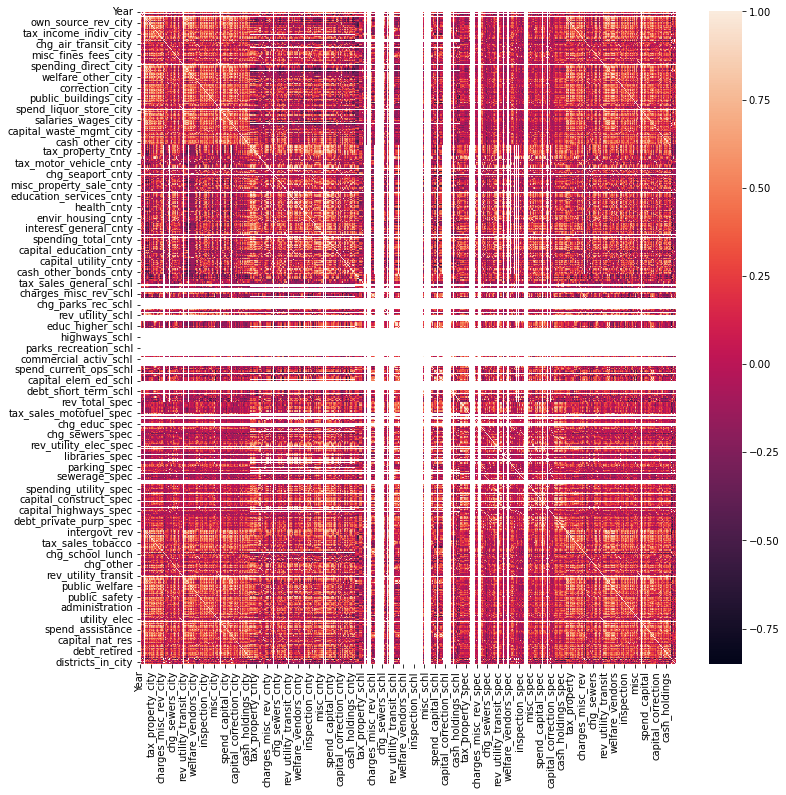

In [63]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), )

In [55]:
df['debt_outstanding_city'].describe()

count       29.000000
mean      6706.655517
std       5433.569314
min        500.030000
25%       3062.910000
50%       5291.560000
75%       7018.580000
max      21331.020000
Name: debt_outstanding_city, dtype: float64

In [61]:
df[['city','debt_outstanding_city', 'rev_total_city']]

,city,debt_outstanding_city,rev_total_city
0,Anchorage,5055.71,6054.78
1,San Francisco,17316.95,12009.81
2,Long Beach,5346.53,4200.84
3,Denver,10482.19,5104.69
4,Hartford,5291.56,7862.83
5,Washington,21331.02,20433.44
6,Atlanta,18284.57,4212.62
7,Chicago,8744.55,3364.77
8,Indianapolis,7018.58,3517.50
9,Baton Rouge,5634.56,2453.47


In [31]:
drop_cols = ['Value','CoC Number','CoC Name','Year', 'year', 'Attribute Name', 'city_name', 'city_types', 'id_city', 'state', 'city']

In [34]:
# trying LinReg with all columns, ignoring collinearity
X = df.drop(columns=drop_cols)
X = X.dropna(axis=1)
y = df['Value']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [51]:
y_train

23      879
22      208
4       561
2      1937
24    29612
6      3752
17      519
13      374
7      4592
26     3346
1      6175
16     2193
0       837
15      125
28     1346
27      240
9       575
8      1229
12      374
11      160
5      3821
Name: Value, dtype: int64

In [38]:
lr = LinearRegression()

In [48]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [95]:
lr.score(X_test_sc, y_test), lr.score(X_train_sc, y_train)

(-4.406181965206701, 1.0)

In [52]:
lr.predict(X_test)

/Users/kei/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


43459281.051221155

### Decision Tree Attempt

-----


In [82]:
dc = DecisionTreeRegressor(max_depth=50, random_state=1)

In [83]:
dc.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=50, random_state=1)

In [84]:
dc.score(X_test, y_test)

-4.852343983725244

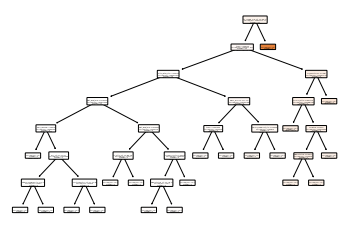

In [86]:
plot_tree(dc, feature_names=X_train.columns, rounded=True, filled=True);

In [90]:
params = {'max_depth': range(1,100)}

In [91]:
gs = GridSearchCV(
    DecisionTreeRegressor(), param_grid=params)

In [94]:
gs.fit(X_train, y_train), gs.score(X_test, y_test)

(GridSearchCV(estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': range(1, 100)}),
 -1.6519139292766112)

There are far too few observations to create a good model for predicting homelessness.

----

Additional things to try with more time:

- Cleaning up more cities and attempting to match counties with cities
- Finding better homelessness information that breaks out counts of homelessness into more granular data. This data had cities, counties, and even multiple counties per observation. Pure chaos.
- Trying more complicated models, ensembling, using neural nets.